## Imports | NN

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Imports | reading  csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Imports | PyTorch Data Iterator

In [3]:
from torch.utils.data.dataset import Dataset
from torchvision.transforms import transforms

## Viewing MetaData (or the whole data in this case)

In [4]:
df = pd.read_csv('TruthTableXOR.csv')[['IN1','IN2','OUT1','OUT2']]
df.head()

,IN1,IN2,OUT1,OUT2
0,0,0,0,1
1,0,1,1,0
2,1,0,1,0
3,1,1,0,1


### Extending class torchvision.Dataset to make custom data-iterator

In [5]:
class myData(Dataset):
    
    def __init__(self,df):
        
        self.X = [Variable(s) for s in torch.FloatTensor(df[['IN1','IN2']].values)]
        self.y = [Variable(s) for s in torch.FloatTensor(df[['OUT1','OUT2']].values)]
    
    def __getitem__(self,i):
        
        return self.X[i],self.y[i]

    def __len__(self):
        return len(self.X)                   

## Instance of the class

In [6]:
myDataObject = myData(df)

## Loading the object and making torchvision dataset object

In [7]:
Data_loader = torch.utils.data.DataLoader(dataset = myDataObject, batch_size = 1, shuffle = False)

## Defining Neural Network

In [8]:
class XORnet(nn.Module):
    
    def __init__(self):
        
        super(XORnet,self).__init__()
            
        self.linear1 = nn.Linear(in_features = 2, out_features = 3, bias = True)
        self.linear2 = nn.Linear(in_features = 3, out_features = 2, bias = True)
        
    def forward(self,t):
        
        t = self.linear1(t)
        t = F.relu(t)
        
        t = self.linear2(t)
        t = F.sigmoid(t)
        
        return t

## Making an XORnet object

In [9]:
myNet = XORnet()
myNet

XORnet(
  (linear1): Linear(in_features=2, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=2, bias=True)
)

## Defining Loss Function and Optimizer

In [10]:
optimizer = torch.optim.Adam(myNet.parameters(), lr=0.001,weight_decay=0.0001)
criterion = nn.MSELoss()

## Defining Training Function

In [11]:
def train(n_epochs):
    
    for i in range(n_epochs):
        
        eloss = 0 
        
        for u,(a1,a2)in enumerate(Data_loader):

        #    print(u,a1,a2)
            
            optimizer.zero_grad()   # zero the gradient buffers
            
            output = myNet(a1)
            loss = criterion(output, a2)
            eloss+=loss
            losses.append(loss)
            loss.backward()
            optimizer.step()
            
        #print('Epoch: ',i, 'Loss', eloss/4)

## Training

In [12]:
net2 = XORnet()
losses = []
train(10000)

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


## Plotting Training Loss

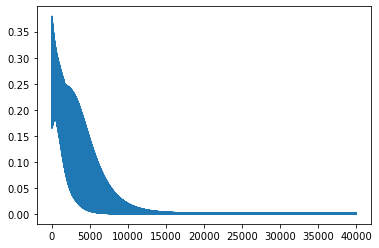

In [13]:
plt.plot(losses)

## Checking Output

In [14]:
[myNet(i) for i in myDataObject.X]

[tensor([0.0224, 0.9776], grad_fn=<SigmoidBackward>),
 tensor([0.9797, 0.0203], grad_fn=<SigmoidBackward>),
 tensor([0.9798, 0.0202], grad_fn=<SigmoidBackward>),
 tensor([0.0406, 0.9594], grad_fn=<SigmoidBackward>)]